## 1. Ïä§ÌÜ†Ï∫êÏä§Ìã± Ìå®Ïä§Ìä∏(Stochastic Fast)

In [ ]:
# Ïä§ÌÜ†Ï∫êÏä§Ìã± Ïò§Ïã§Î†àÏù¥ÌÑ∞ Í∞úÎÖê ÏöîÏïΩ
# %K (FastK): ÌòÑÏû¨ Ï¢ÖÍ∞ÄÍ∞Ä ÏùºÏ†ï Í∏∞Í∞Ñ ÎèôÏïà Í≥†Í∞Ä-Ï†ÄÍ∞Ä Î≤îÏúÑÏùò Ïñ¥ÎîîÏØ§ ÏûàÎäîÏßÄÎ•º Î∞±Î∂ÑÏú®Î°ú ÌëúÏãú
# %ùêæ=ÌòÑÏû¨¬†Ï¢ÖÍ∞Ä‚àí[NÏùº¬†ÏµúÏ†ÄÍ∞Ä]/[ NÏùº¬†ÏµúÍ≥†Í∞Ä‚àíNÏùº¬†ÏµúÏ†ÄÍ∞Ä] x 100
# %D (FastD): %KÏùò Ïù¥ÎèôÌèâÍ∑† (Î≥¥ÌÜµ 3Ïùº ÌèâÍ∑†)
# ÏùºÎ∞òÏ†ÅÏúºÎ°ú N=14Ïùº, D=3ÏùºÏùÑ ÏÇ¨Ïö©ÌïòÎ©∞,%K > %D Ïù¥Í≥† %K < 20: Îß§Ïàò Ïã†Ìò∏ %K < %D Ïù¥Í≥† %K > 80: Îß§ÎèÑ Ïã†Ìò∏
# --> Í∏∞Î≥∏ Í∞íÏùÄ 14ÏùºÏù¥Î©∞, 5Ïùº~ 30Ïùº ÏÇ¨Ïù¥Ïùò Í∞íÏù¥ Ï†ÅÏ†àÌïòÎã§. 

#  ÏÇºÏÑ±Ï†ÑÏûê

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\pykrx\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


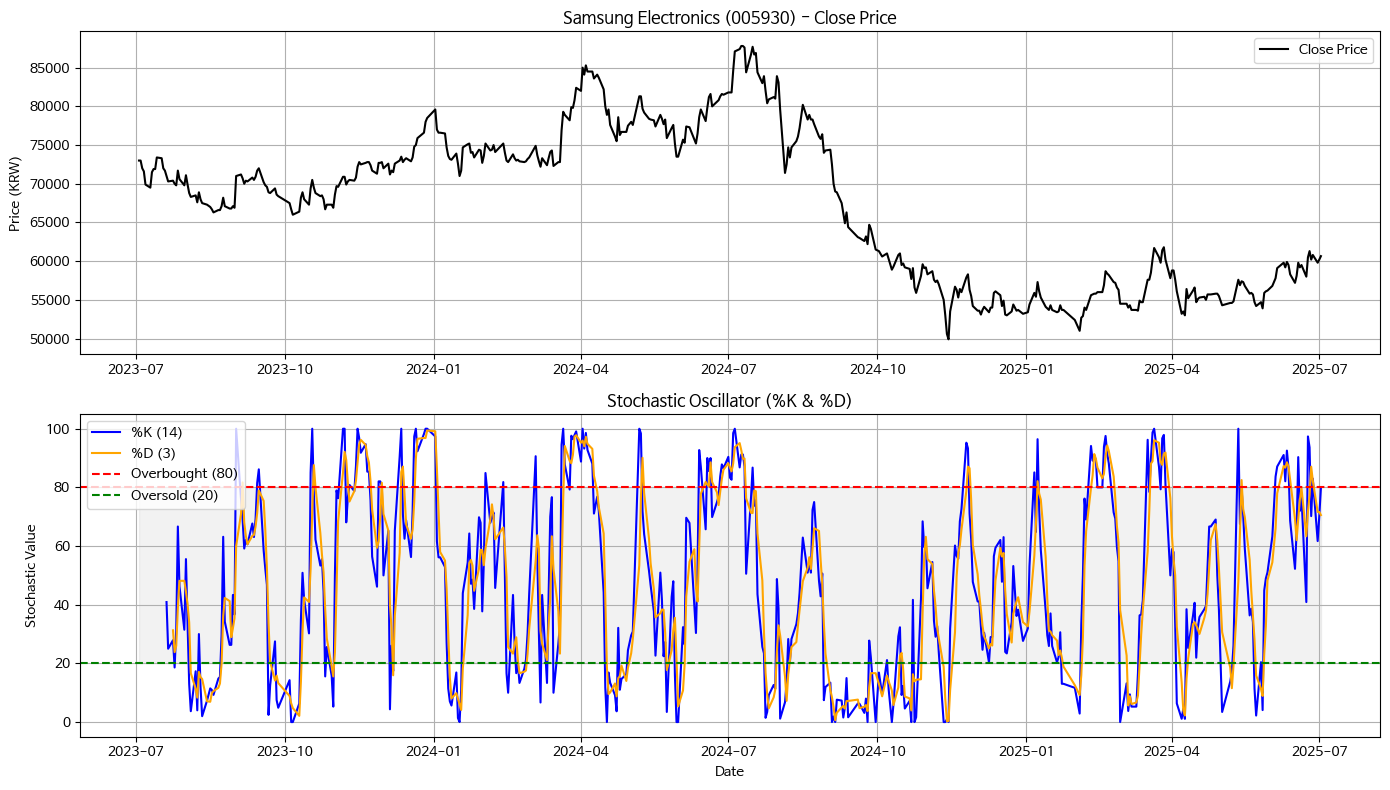

In [2]:
#### from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pykrx import stock
# 1. ÎÇ†Ïßú Î≤îÏúÑ ÏÑ§Ï†ï (ÏµúÍ∑º 2ÎÖÑ)
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. ÏÇºÏÑ±Ï†ÑÏûê ÏãúÏÑ∏ Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 3. Ïä§ÌÜ†Ï∫êÏä§Ìã± Ïò§Ïã§Î†àÏù¥ÌÑ∞ Í≥ÑÏÇ∞
n = 14  # Í∏∞Í∞Ñ ÏÑ§Ï†ï
low_min = df['Ï†ÄÍ∞Ä'].rolling(window=n).min()
high_max = df['Í≥†Í∞Ä'].rolling(window=n).max()
df['%K'] = (df['Ï¢ÖÍ∞Ä'] - low_min) / (high_max - low_min) * 100
df['%D'] = df['%K'].rolling(window=3).mean()  # 3Ïùº Ïù¥ÎèôÌèâÍ∑†ÏÑ†

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))

# (1) Ï¢ÖÍ∞Ä Í∑∏ÎûòÌîÑ
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Close Price', color='black')
plt.title('Samsung Electronics (005930) - Close Price')
plt.ylabel('Price (KRW)')
plt.grid(True)
plt.legend()

# (2) Ïä§ÌÜ†Ï∫êÏä§Ìã± %K, %D Í∑∏ÎûòÌîÑ
plt.subplot(2, 1, 2)
plt.plot(df.index, df['%K'], label='%K (14)', color='blue')
plt.plot(df.index, df['%D'], label='%D (3)', color='orange')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.fill_between(df.index, 20, 80, color='gray', alpha=0.1)
plt.title('Stochastic Oscillator (%K & %D)')
plt.xlabel('Date')
plt.ylabel('Stochastic Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Íµ¨Í∞Ñ	Ìï¥ÏÑù ÏùòÎØ∏
# %K > %D, %K < 20	Îß§Ïàò Ïã†Ìò∏ Í∞ÄÎä•ÏÑ± (Í≥ºÎß§ÎèÑÏóêÏÑú Î∞òÎì± ÏãúÏ†ê)
# %K < %D, %K > 80	Îß§ÎèÑ Ïã†Ìò∏ Í∞ÄÎä•ÏÑ± (Í≥ºÎß§ÏàòÏóêÏÑú ÌïòÎùΩ ÏãúÏ†ê)

Ïä§ÌÜ†Ï∫êÏä§Ìã± Ïò§Ïã§Î†àÏù¥ÌÑ∞(%K, %D)Î•º ÌôúÏö©Ìï¥ Îß§Îß§ ÏãúÏ†êÏùÑ ÏûêÎèôÏúºÎ°ú ÌÉêÏßÄÌïòÍ≥†,
Ïã§Ï†ú Îß§Ïàò/Îß§ÎèÑ ÏãúÏ†ê Í∏∞Ï§ÄÏúºÎ°ú ÏàòÏùµÎ•†ÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Î∞±ÌÖåÏä§Ìä∏

In [ ]:
# Ï°∞Í±¥	ÏÑ§Î™Ö
# üìà Îß§Ïàò ÏãúÏ†ê	%KÍ∞Ä 20 ÏïÑÎûòÏù¥Í≥†, %KÍ∞Ä %DÎ•º ÏÉÅÌñ• ÎèåÌåå
# üìâ Îß§ÎèÑ ÏãúÏ†ê	%KÍ∞Ä 80 Ïù¥ÏÉÅÏù¥Í≥†, %KÍ∞Ä %DÎ•º ÌïòÌñ• ÎèåÌåå
# üéØ ÏàòÏùµÎ•† Í≥ÑÏÇ∞	Îß§Ïàò ÌõÑ Ï≤´ Îß§ÎèÑ ÏãúÍπåÏßÄ Î≥¥Ïú†Ìïú ÌõÑ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
# üí∏ ÏàòÏàòÎ£å ÏóÜÏùå (ÏõêÌïòÏãúÎ©¥ Ï∂îÍ∞Ä Í∞ÄÎä•)	

Ï¥ù Í±∞Îûò ÌöüÏàò: 7
ÌèâÍ∑† ÏàòÏùµÎ•†: 1.80%
ÎàÑÏ†Å ÏàòÏùµÎ•†: 4.83%


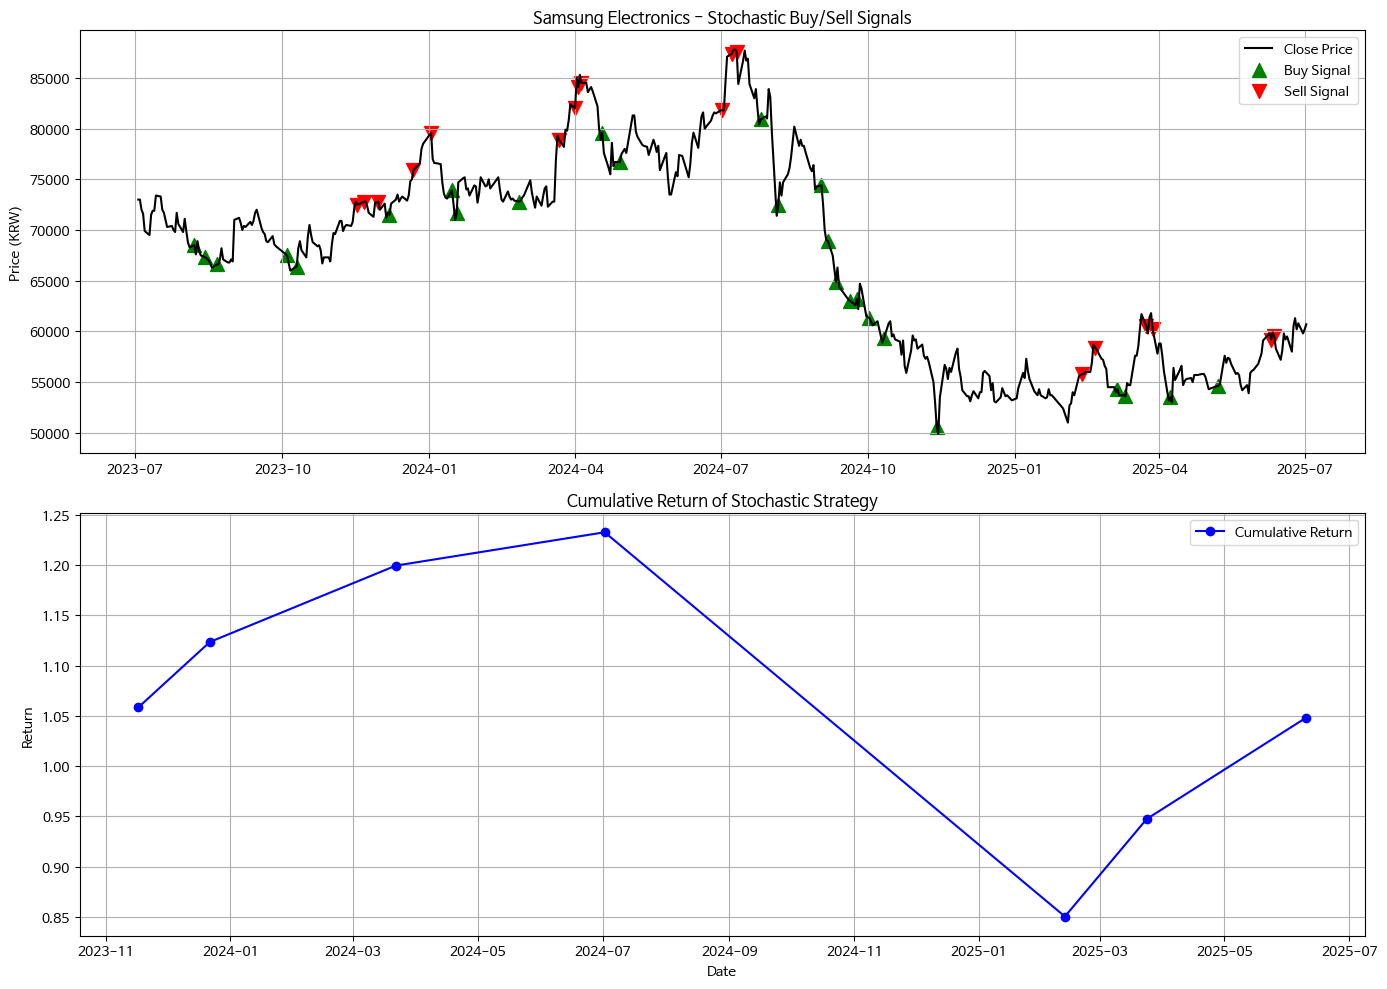

In [3]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 2. Ïä§ÌÜ†Ï∫êÏä§Ìã± Í≥ÑÏÇ∞
n = 14
low_min = df['Ï†ÄÍ∞Ä'].rolling(window=n).min()
high_max = df['Í≥†Í∞Ä'].rolling(window=n).max()
df['%K'] = (df['Ï¢ÖÍ∞Ä'] - low_min) / (high_max - low_min) * 100
df['%D'] = df['%K'].rolling(window=3).mean()

# 3. Îß§Îß§ ÏãúÏ†ê ÌÉêÏßÄ
df['prev_%K'] = df['%K'].shift(1)
df['prev_%D'] = df['%D'].shift(1)

df['Buy'] = (df['prev_%K'] < df['prev_%D']) & (df['%K'] > df['%D']) & (df['%K'] < 20)
df['Sell'] = (df['prev_%K'] > df['prev_%D']) & (df['%K'] < df['%D']) & (df['%K'] > 80)

# 4. Î∞±ÌÖåÏä§Ìä∏ Ïã§Ìñâ
trades = []
position = None

for date, row in df.iterrows():
    if position is None and row['Buy']:
        position = {
            'buy_date': date,
            'buy_price': row['Ï¢ÖÍ∞Ä']
        }
    elif position is not None and row['Sell']:
        position['sell_date'] = date
        position['sell_price'] = row['Ï¢ÖÍ∞Ä']
        position['return'] = (position['sell_price'] - position['buy_price']) / position['buy_price']
        trades.append(position)
        position = None

results = pd.DataFrame(trades)
if not results.empty:
    results['cum_return'] = (1 + results['return']).cumprod()

# 5. Í≤∞Í≥º Ï∂úÎ†•
print("Ï¥ù Í±∞Îûò ÌöüÏàò:", len(results))
if not results.empty:
    print("ÌèâÍ∑† ÏàòÏùµÎ•†: {:.2f}%".format(results['return'].mean() * 100))
    print("ÎàÑÏ†Å ÏàòÏùµÎ•†: {:.2f}%".format((results['cum_return'].iloc[-1] - 1) * 100))

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 10))

# (1) Ï¢ÖÍ∞Ä + ÏãúÍ∑∏ÎÑê
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Close Price', color='black')
plt.scatter(df[df['Buy']].index, df[df['Buy']]['Ï¢ÖÍ∞Ä'], marker='^', color='green', label='Buy Signal', s=100)
plt.scatter(df[df['Sell']].index, df[df['Sell']]['Ï¢ÖÍ∞Ä'], marker='v', color='red', label='Sell Signal', s=100)
plt.title('Samsung Electronics - Stochastic Buy/Sell Signals')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

# (2) ÎàÑÏ†Å ÏàòÏùµÎ•†
if not results.empty:
    plt.subplot(2, 1, 2)
    plt.plot(results['sell_date'], results['cum_return'], marker='o', label='Cumulative Return', color='blue')
    plt.title('Cumulative Return of Stochastic Strategy')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Ìï≠Î™©	ÏùòÎØ∏
# Buy Signal	Í≥ºÎß§ÎèÑ Íµ¨Í∞ÑÏóêÏÑú %KÍ∞Ä %DÎ•º ÏÉÅÌñ• ÎèåÌåå
# Sell Signal	Í≥ºÎß§Ïàò Íµ¨Í∞ÑÏóêÏÑú %KÍ∞Ä %DÎ•º ÌïòÌñ• ÎèåÌåå
# Return	Ìïú Î≤àÏùò Îß§Ïàò-Îß§ÎèÑ Í±∞Îûò ÏàòÏùµÎ•†
# Cumulative Return	ÎàÑÏ†Å ÏàòÏùµÎ•† (Î≥µÎ¶¨ Í∏∞Ï§Ä)

### RSI + Bollinger Bands + Stochastic Ï†ÑÎûµ

In [ ]:
# Ï†ÑÎûµ Íµ¨ÏÑ±
# ÏßÄÌëú	              Ï°∞Í±¥	ÏùòÎØ∏
# RSI(14)	            RSI < 30	Í≥ºÎß§ÎèÑ Íµ¨Í∞Ñ (Îß§Ïàò ÌõÑÎ≥¥)
# Î≥ºÎ¶∞Ï†Ä Î∞¥Îìú	       Ï¢ÖÍ∞Ä < ÌïòÎã® Î∞¥Îìú	ÌïòÎã® ÎèåÌåå (Í≥ºÎß§ÎèÑ ÌôïÏã†)
# Ïä§ÌÜ†Ï∫êÏä§Ìã±	     %K < 20 AND %K > %D	Îß§Ïàò ÌÉÄÏù¥Î∞ç Ïã†Ìò∏
# ‚ñ∂ Îß§Ïàò Ï°∞Í±¥	ÏúÑ Ï°∞Í±¥ Î™®Îëê ÎßåÏ°±	
# ‚ñ∂ Îß§ÎèÑ Ï°∞Í±¥	RSI > 70 AND Ï¢ÖÍ∞Ä > ÏÉÅÎã® Î∞¥Îìú AND %K < %D	

Ï¥ù Í±∞Îûò ÌöüÏàò: 0


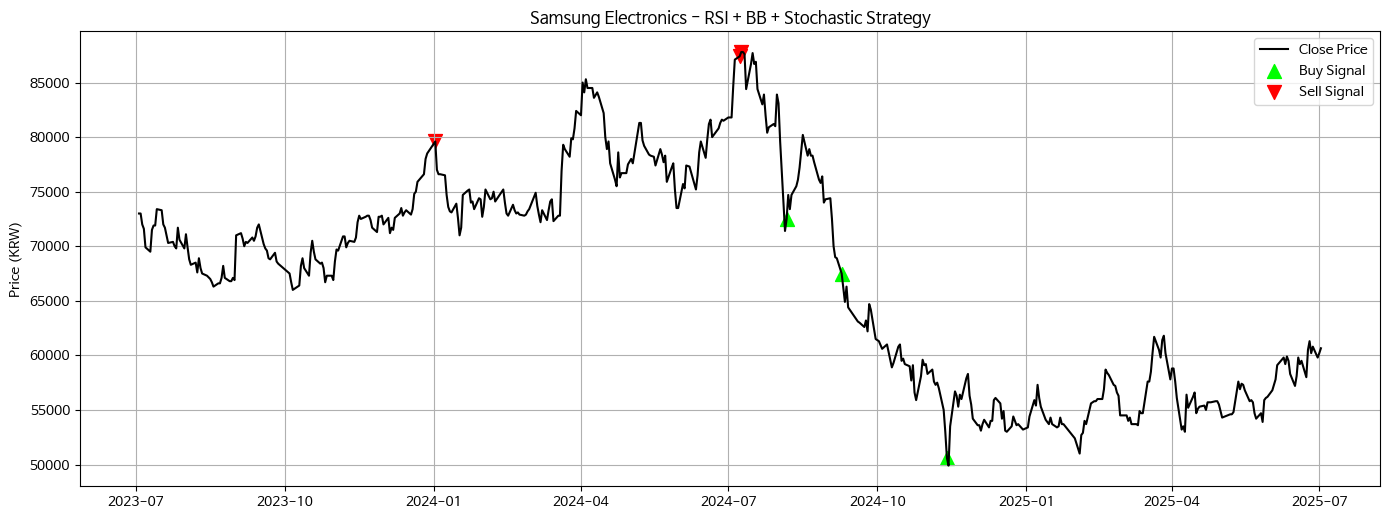

In [4]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. ÎÇ†Ïßú ÏÑ§Ï†ï (2ÎÖÑ)
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. ÏÇºÏÑ±Ï†ÑÏûê Îç∞Ïù¥ÌÑ∞
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 3. RSI(14)
delta = df['Ï¢ÖÍ∞Ä'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# 4. Î≥ºÎ¶∞Ï†Ä Î∞¥Îìú (20Ïùº)
window = 20
df['MA20'] = df['Ï¢ÖÍ∞Ä'].rolling(window).mean()
df['STD20'] = df['Ï¢ÖÍ∞Ä'].rolling(window).std()
df['Upper'] = df['MA20'] + 2 * df['STD20']
df['Lower'] = df['MA20'] - 2 * df['STD20']

# 5. Ïä§ÌÜ†Ï∫êÏä§Ìã± (%K, %D)
n = 14
low_min = df['Ï†ÄÍ∞Ä'].rolling(window=n).min()
high_max = df['Í≥†Í∞Ä'].rolling(window=n).max()
df['%K'] = (df['Ï¢ÖÍ∞Ä'] - low_min) / (high_max - low_min) * 100
df['%D'] = df['%K'].rolling(window=3).mean()

df['prev_%K'] = df['%K'].shift(1)
df['prev_%D'] = df['%D'].shift(1)

# 6. Îß§Ïàò/Îß§ÎèÑ Ï°∞Í±¥
df['Buy'] = (
    (df['RSI'] < 30) &
    (df['Ï¢ÖÍ∞Ä'] < df['Lower']) &
    (df['%K'] < 20) &
    (df['%K'] > df['%D'])
)

df['Sell'] = (
    (df['RSI'] > 70) &
    (df['Ï¢ÖÍ∞Ä'] > df['Upper']) &
    (df['%K'] > 80) &
    (df['%K'] < df['%D'])
)

# 7. Î∞±ÌÖåÏä§Ìä∏
trades = []
position = None

for date, row in df.iterrows():
    if position is None and row['Buy']:
        position = {'buy_date': date, 'buy_price': row['Ï¢ÖÍ∞Ä']}
    elif position is not None and row['Sell']:
        position['sell_date'] = date
        position['sell_price'] = row['Ï¢ÖÍ∞Ä']
        position['return'] = (position['sell_price'] - position['buy_price']) / position['buy_price']
        trades.append(position)
        position = None

results = pd.DataFrame(trades)
if not results.empty:
    results['cum_return'] = (1 + results['return']).cumprod()

# 8. Í≤∞Í≥º Ï∂úÎ†•
print("Ï¥ù Í±∞Îûò ÌöüÏàò:", len(results))
if not results.empty:
    print("ÌèâÍ∑† ÏàòÏùµÎ•†: {:.2f}%".format(results['return'].mean() * 100))
    print("ÎàÑÏ†Å ÏàòÏùµÎ•†: {:.2f}%".format((results['cum_return'].iloc[-1] - 1) * 100))

# 9. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 10))

# (1) Ï¢ÖÍ∞Ä + Îß§Îß§ ÏãúÏ†ê
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Close Price', color='black')
plt.scatter(df[df['Buy']].index, df[df['Buy']]['Ï¢ÖÍ∞Ä'], marker='^', color='lime', label='Buy Signal', s=100)
plt.scatter(df[df['Sell']].index, df[df['Sell']]['Ï¢ÖÍ∞Ä'], marker='v', color='red', label='Sell Signal', s=100)
plt.title('Samsung Electronics - RSI + BB + Stochastic Strategy')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

# (2) ÎàÑÏ†Å ÏàòÏùµÎ•†
if not results.empty:
    plt.subplot(2, 1, 2)
    plt.plot(results['sell_date'], results['cum_return'], marker='o', label='Cumulative Return', color='blue')
    plt.title('Cumulative Return (Î≥µÌï© Ï†ÑÎûµ)')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


### Î≥µÌï© Ï†ÑÎûµ + ÏàòÏàòÎ£å Î∞òÏòÅ Î∞±ÌÖåÏä§Ìä∏

In [ ]:
## 0.3%Ïùò Îß§Ïàò¬∑Îß§ÎèÑ ÏàòÏàòÎ£å(Ï¥ù 0.6%)Î•º Î∞òÏòÅ

Ï¥ù Í±∞Îûò ÌöüÏàò: 0


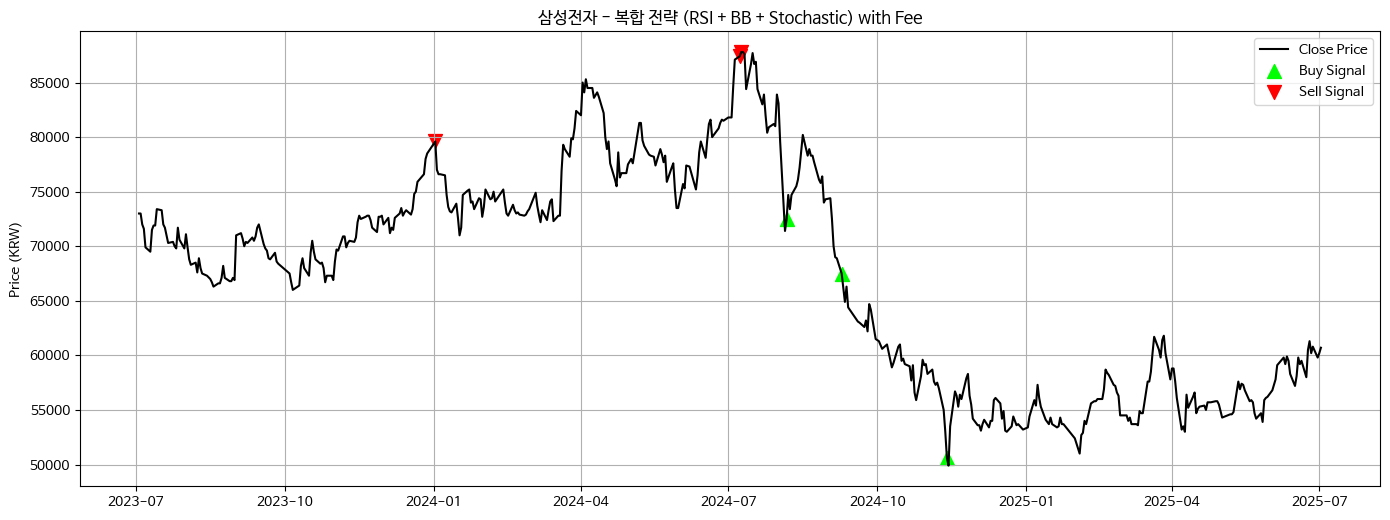

In [5]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. ÎÇ†Ïßú ÏÑ§Ï†ï
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. ÏÇºÏÑ±Ï†ÑÏûê Îç∞Ïù¥ÌÑ∞
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 3. Í∏∞Ïà†ÏßÄÌëú Í≥ÑÏÇ∞: RSI, Î≥ºÎ¶∞Ï†Ä Î∞¥Îìú, Ïä§ÌÜ†Ï∫êÏä§Ìã±
# RSI
delta = df['Ï¢ÖÍ∞Ä'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Î≥ºÎ¶∞Ï†Ä Î∞¥Îìú
window = 20
df['MA20'] = df['Ï¢ÖÍ∞Ä'].rolling(window).mean()
df['STD20'] = df['Ï¢ÖÍ∞Ä'].rolling(window).std()
df['Upper'] = df['MA20'] + 2 * df['STD20']
df['Lower'] = df['MA20'] - 2 * df['STD20']

# Ïä§ÌÜ†Ï∫êÏä§Ìã±
n = 14
low_min = df['Ï†ÄÍ∞Ä'].rolling(window=n).min()
high_max = df['Í≥†Í∞Ä'].rolling(window=n).max()
df['%K'] = (df['Ï¢ÖÍ∞Ä'] - low_min) / (high_max - low_min) * 100
df['%D'] = df['%K'].rolling(window=3).mean()
df['prev_%K'] = df['%K'].shift(1)
df['prev_%D'] = df['%D'].shift(1)

# 4. Îß§Ïàò/Îß§ÎèÑ Ï°∞Í±¥
df['Buy'] = (
    (df['RSI'] < 30) &
    (df['Ï¢ÖÍ∞Ä'] < df['Lower']) &
    (df['%K'] < 20) & (df['%K'] > df['%D'])
)

df['Sell'] = (
    (df['RSI'] > 70) &
    (df['Ï¢ÖÍ∞Ä'] > df['Upper']) &
    (df['%K'] > 80) & (df['%K'] < df['%D'])
)

# 5. Î∞±ÌÖåÏä§Ìä∏ (ÏàòÏàòÎ£å 0.3% Î∞òÏòÅ)
fee = 0.003
trades = []
position = None

for date, row in df.iterrows():
    if position is None and row['Buy']:
        position = {
            'buy_date': date,
            'buy_price': row['Ï¢ÖÍ∞Ä'] * (1 + fee)
        }
    elif position is not None and row['Sell']:
        sell_price = row['Ï¢ÖÍ∞Ä'] * (1 - fee)
        position['sell_date'] = date
        position['sell_price'] = sell_price
        position['return'] = (sell_price - position['buy_price']) / position['buy_price']
        trades.append(position)
        position = None

results = pd.DataFrame(trades)
if not results.empty:
    results['cum_return'] = (1 + results['return']).cumprod()

# 6. Ï∂úÎ†• Í≤∞Í≥º
print("Ï¥ù Í±∞Îûò ÌöüÏàò:", len(results))
if not results.empty:
    print("ÌèâÍ∑† ÏàòÏùµÎ•† (ÏàòÏàòÎ£å Ìè¨Ìï®): {:.2f}%".format(results['return'].mean() * 100))
    print("ÎàÑÏ†Å ÏàòÏùµÎ•† (ÏàòÏàòÎ£å Ìè¨Ìï®): {:.2f}%".format((results['cum_return'].iloc[-1] - 1) * 100))

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 10))

# (1) Ï¢ÖÍ∞Ä Î∞è ÏãúÍ∑∏ÎÑê ÌëúÏãú
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Close Price', color='black')
plt.scatter(df[df['Buy']].index, df[df['Buy']]['Ï¢ÖÍ∞Ä'], marker='^', color='lime', label='Buy Signal', s=100)
plt.scatter(df[df['Sell']].index, df[df['Sell']]['Ï¢ÖÍ∞Ä'], marker='v', color='red', label='Sell Signal', s=100)
plt.title('ÏÇºÏÑ±Ï†ÑÏûê - Î≥µÌï© Ï†ÑÎûµ (RSI + BB + Stochastic) with Fee')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

# (2) ÎàÑÏ†Å ÏàòÏùµÎ•†
if not results.empty:
    plt.subplot(2, 1, 2)
    plt.plot(results['sell_date'], results['cum_return'], marker='o', color='blue', label='Cumulative Return')
    plt.title('ÎàÑÏ†Å ÏàòÏùµÎ•† (0.3% ÏàòÏàòÎ£å Ìè¨Ìï®)')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## 2. Stochastic Slow (ÏÇºÏÑ±Ï†ÑÏûê)

In [ ]:
# Ïä§ÌÜ†Ï∫êÏä§Ìã± Ïä¨Î°úÏö∞Îäî Í∏∞Ï°¥ Ïä§ÌÜ†Ï∫êÏä§Ìã± Ìå®Ïä§Ìä∏Ïùò Î≥ÄÎèôÏÑ±ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ ÎßåÎì† ÌèâÍ∑† Í∏∞Î∞ò ÏôÑÌôî ÏßÄÌëúÏûÖÎãàÎã§.
# Ï£ºÏöî Íµ¨ÏÑ±
# Ïù¥Î¶Ñ	ÏÑ§Î™Ö
# %K_fast	Í∏∞Î≥∏ Ïä§ÌÜ†Ï∫êÏä§Ìã± %K
# %K_slow	%K_fastÏùò 3Ïùº Ïù¥ÎèôÌèâÍ∑†
# %D_slow	%K_slowÏùò 3Ïùº Ïù¥ÎèôÌèâÍ∑† (ÏãúÍ∑∏ÎÑêÏÑ†)

In [ ]:
# Ìï¥ÏÑù Ìè¨Ïù∏Ìä∏
# %K_slow < 20: Í≥ºÎß§ÎèÑÎ°ú Î∞òÎì± Í∞ÄÎä•ÏÑ±
# %K_slow > 80: Í≥ºÎß§ÏàòÎ°ú ÌïòÎùΩ Í∞ÄÎä•ÏÑ±
# %K_slow > %D_slow: Îß§Ïàò Ïã†Ìò∏
# %K_slow < %D_slow: Îß§ÎèÑ Ïã†Ìò∏

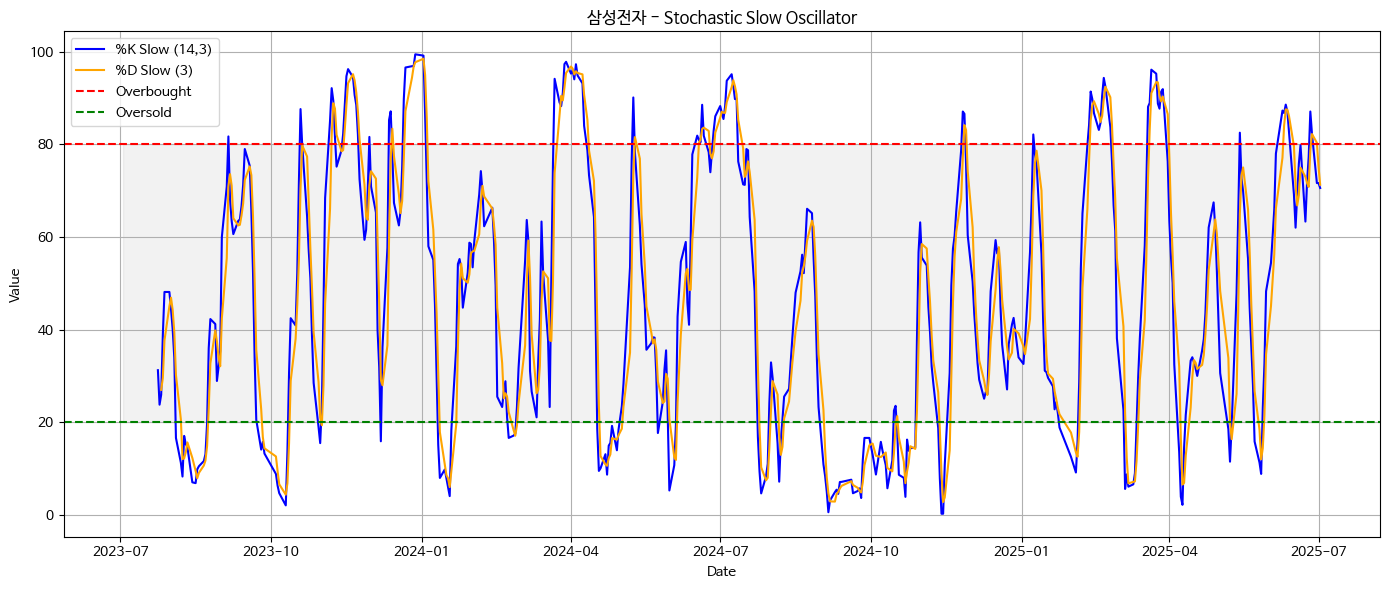

In [7]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. ÎÇ†Ïßú Î≤îÏúÑ ÏÑ§Ï†ï
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. ÏÇºÏÑ±Ï†ÑÏûê Îç∞Ïù¥ÌÑ∞
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 3. Ïä§ÌÜ†Ï∫êÏä§Ìã± Ïä¨Î°úÏö∞ Í≥ÑÏÇ∞ (%K: 14, %D: 3, Slow %D: 3)
low_min = df['Ï†ÄÍ∞Ä'].rolling(window=14).min()
high_max = df['Í≥†Í∞Ä'].rolling(window=14).max()
df['%K_fast'] = (df['Ï¢ÖÍ∞Ä'] - low_min) / (high_max - low_min) * 100
df['%K_slow'] = df['%K_fast'].rolling(window=3).mean()
df['%D_slow'] = df['%K_slow'].rolling(window=3).mean()

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['%K_slow'], label='%K Slow (14,3)', color='blue')
plt.plot(df.index, df['%D_slow'], label='%D Slow (3)', color='orange')
plt.axhline(80, color='red', linestyle='--', label='Overbought')
plt.axhline(20, color='green', linestyle='--', label='Oversold')
plt.fill_between(df.index, 20, 80, color='gray', alpha=0.1)
plt.title('ÏÇºÏÑ±Ï†ÑÏûê - Stochastic Slow Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###  Îß§Îß§ ÏãúÏ†ê ÏûêÎèô ÌÉêÏßÄ Î∞è Î∞±ÌÖåÏä§Ìä∏ 

In [ ]:
# Ï†ÑÎûµ Ï†ïÏùò
# Ï°∞Í±¥ Íµ¨Î∂Ñ	Í∏∞Ï§Ä	ÏÑ§Î™Ö
# Îß§Ïàò	%K_slow < 20 AND %K_slow > %D_slow	Í≥ºÎß§ÎèÑ + Í≥®Îì†ÌÅ¨Î°úÏä§
# Îß§ÎèÑ	%K_slow > 80 AND %K_slow < %D_slow	Í≥ºÎß§Ïàò + Îç∞ÎìúÌÅ¨Î°úÏä§

In [ ]:
# Ï†ÑÏ≤¥ ÏΩîÎìú (ÏàòÏàòÎ£å 0.3% Î∞òÏòÅ)

Ï¥ù Í±∞Îûò ÌöüÏàò: 6
ÌèâÍ∑† ÏàòÏùµÎ•†: -0.31%
ÎàÑÏ†Å ÏàòÏùµÎ•†: -8.82%


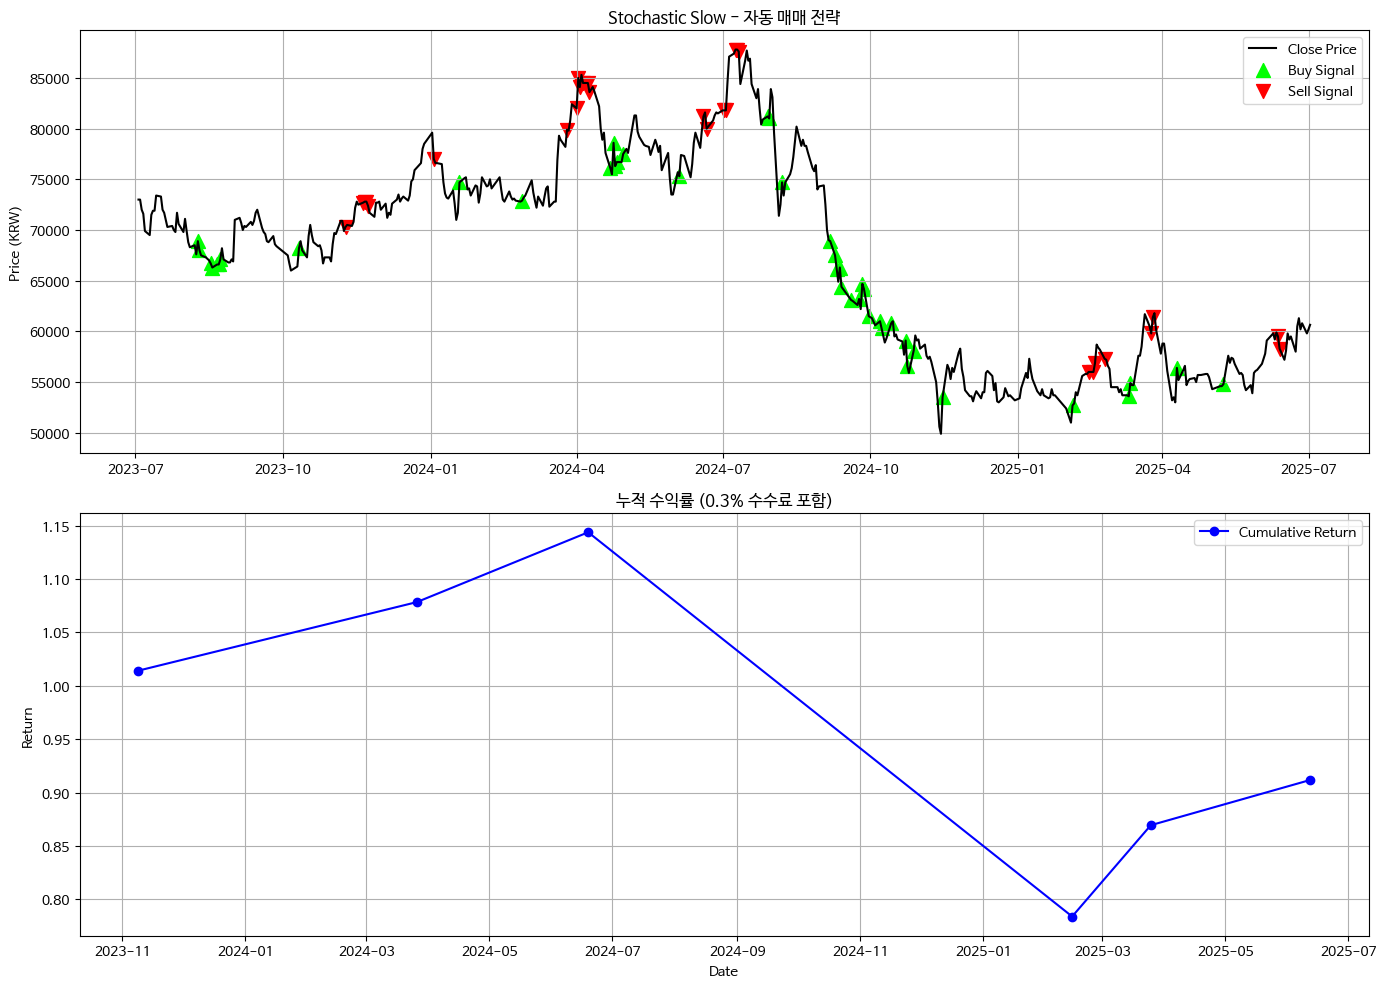

In [8]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 1. ÎÇ†Ïßú ÏÑ§Ï†ï
end_date = datetime.today().strftime('%Y%m%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y%m%d')

# 2. ÏÇºÏÑ±Ï†ÑÏûê ÏãúÏÑ∏ Îç∞Ïù¥ÌÑ∞
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 3. Ïä§ÌÜ†Ï∫êÏä§Ìã± Ïä¨Î°úÏö∞ Í≥ÑÏÇ∞
n = 14
low_min = df['Ï†ÄÍ∞Ä'].rolling(window=n).min()
high_max = df['Í≥†Í∞Ä'].rolling(window=n).max()
df['%K_fast'] = (df['Ï¢ÖÍ∞Ä'] - low_min) / (high_max - low_min) * 100
df['%K_slow'] = df['%K_fast'].rolling(window=3).mean()
df['%D_slow'] = df['%K_slow'].rolling(window=3).mean()

# 4. Îß§Ïàò/Îß§ÎèÑ Ï°∞Í±¥ Ï†ïÏùò
df['Buy'] = (df['%K_slow'] < 20) & (df['%K_slow'] > df['%D_slow'])
df['Sell'] = (df['%K_slow'] > 80) & (df['%K_slow'] < df['%D_slow'])

# 5. Î∞±ÌÖåÏä§Ìä∏ Ïã§Ìñâ (ÏàòÏàòÎ£å 0.3% Î∞òÏòÅ)
fee = 0.003
position = None
trades = []

for date, row in df.iterrows():
    if position is None and row['Buy']:
        position = {'buy_date': date, 'buy_price': row['Ï¢ÖÍ∞Ä'] * (1 + fee)}
    elif position is not None and row['Sell']:
        sell_price = row['Ï¢ÖÍ∞Ä'] * (1 - fee)
        position['sell_date'] = date
        position['sell_price'] = sell_price
        position['return'] = (sell_price - position['buy_price']) / position['buy_price']
        trades.append(position)
        position = None

results = pd.DataFrame(trades)
if not results.empty:
    results['cum_return'] = (1 + results['return']).cumprod()

# 6. Ï∂úÎ†• Í≤∞Í≥º
print("Ï¥ù Í±∞Îûò ÌöüÏàò:", len(results))
if not results.empty:
    print("ÌèâÍ∑† ÏàòÏùµÎ•†: {:.2f}%".format(results['return'].mean() * 100))
    print("ÎàÑÏ†Å ÏàòÏùµÎ•†: {:.2f}%".format((results['cum_return'].iloc[-1] - 1) * 100))

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 10))

# (1) Ï¢ÖÍ∞Ä + ÏãúÍ∑∏ÎÑê
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Ï¢ÖÍ∞Ä'], label='Close Price', color='black')
plt.scatter(df[df['Buy']].index, df[df['Buy']]['Ï¢ÖÍ∞Ä'], marker='^', color='lime', label='Buy Signal', s=100)
plt.scatter(df[df['Sell']].index, df[df['Sell']]['Ï¢ÖÍ∞Ä'], marker='v', color='red', label='Sell Signal', s=100)
plt.title('Stochastic Slow - ÏûêÎèô Îß§Îß§ Ï†ÑÎûµ')
plt.ylabel('Price (KRW)')
plt.legend()
plt.grid(True)

# (2) ÎàÑÏ†Å ÏàòÏùµÎ•†
if not results.empty:
    plt.subplot(2, 1, 2)
    plt.plot(results['sell_date'], results['cum_return'], marker='o', color='blue', label='Cumulative Return')
    plt.title('ÎàÑÏ†Å ÏàòÏùµÎ•† (0.3% ÏàòÏàòÎ£å Ìè¨Ìï®)')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Buy: %K_slow < 20 Ïù¥Î©¥ÏÑú %K_slowÍ∞Ä %D_slowÎ•º ÏÉÅÌñ• ÎèåÌåå ‚Üí Îß§Ïàò
# Sell: %K_slow > 80 Ïù¥Î©¥ÏÑú %K_slowÍ∞Ä %D_slowÎ•º ÌïòÌñ• ÎèåÌåå ‚Üí Îß§ÎèÑ
# return: Îß§Ïàò~Îß§ÎèÑ Îã®Ïùº Í±∞Îûò ÏàòÏùµÎ•† (ÏàòÏàòÎ£å Ìè¨Ìï®)
# cum_return: Î≥µÎ¶¨ ÎàÑÏ†Å ÏàòÏùµÎ•†